# Task 6.2 Exploring Relationships - Texas

### Contents
** **
A) Introduction to per-region analysis.

Step 1:  Standard prerequisites, including library loading, path setup, and data import from Task 1.

Step 2:  Picking out variables suitable for exploratory visual analysis, based on the questions defined in Task 6.1.

Step 3:  Correlation matrix heatmap (colored).

Step 4:  Scatterplots for the variables with the strongest correlations, and examination of the nature of their relationships.

Step 5:  Pair plot of the entire data set.

Step 6:  Categorical plots.

Step 7:  Revisiting questions posed in Task 1.

Step 8:  Discussion of hypothesis (or lack thereof).

# Introduction to per-region analysis.

## Analyzing the entire original dataset has failed to produce promising correlations.  This might be because the data is for too large and varied a geographical area, namely all 48 of the contiguous United States; weather is bound to vary significantly.

### According to the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI), the area of the contiguous United States can be divided into nine distinct climatic regions, each comprising a group of states:

### 1) Northeast:  Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
### 2) Upper Midwest:  Iowa, Michigan, Minnesota, Wisconsin
### 3) Ohio Valley:  Illinois, Indiana, Kentucky, Missouri, Ohio, Tennessee, West Virginia
### 4) Southeast:  Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia
### 5) Northern Rockies and Plains:  Montana, Nebraska, North Dakota, South Dakota, Wyoming
### 6) South:  Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas
### 7) Southwest:  Arizona, Colorado, New Mexico, Utah
### 8) Northwest:  Idaho, Oregon, Washington
### 9) West:  California, Nevada

### From https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions :
#### "Through climate analysis, National Centers for Environmental Information scientists have identified nine climatically consistent regions within the contiguous United States which are useful for putting current climate anomalies into a historical perspective (Karl and Koss, 1984)."
##### Source:  Thomas R. Karl and Walter James Koss, 1984: "Regional and National Monthly, Seasonal, and Annual Temperature Weighted by Area, 1895-1983." Historical Climatology Series 4-3, National Climatic Data Center, Asheville, NC, 38 pp.


## I have split the df_all_states_regions dataframe into a separate dataframe for each region.  This offers two advantages.
## 1) Each region can be analyzed separately for correlations and trends.
## 2) CPU-intensive operations can be run for reach region in a separate Jupyter Notebook, allowing us to take advantage of multiple CPUs for simultaneous processing, avoiding the singl-CPU bottleneck.

## This split was done in an Addendum section added to my previously-approved Jupyter Notebook for Task 6.2.
## The STATE to be studied in this current Notebook is Texas, which is in the *'South'* region.
## The relevant dataframe is stored in the file called *df_south.Task-6.2.pkl* .

# Step 1:  Standard prerequisites, including library loading, path setup, and data import for the given region.

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# For future reference, Exercise 6.2 introduced graphical libraries Bokeh and Plotly.
# import bokeh
# import plotly

In [3]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [4]:
# Import itertools to help loop through lots of things.
import itertools

In [5]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [6]:
# Set a PATH variable.

In [7]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [8]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [9]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [10]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [11]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

## Load our digested data for the region.

In [12]:
region_code = 'south'

In [13]:
#print(os.path.join(path, '02-Data', 'Prepared-Data', 'df_south.Task-6.2.pkl'))
print(os.path.join(path, '02-Data', 'Prepared-Data', 'df_' + region_code + '.Task-6.2.pkl'))

/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Prepared-Data/df_south.Task-6.2.pkl


In [14]:
df_region = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_south.Task-6.2.pkl'))

In [15]:
df = df_region.loc[df_region['State'] == 'TX']

In [16]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515813 entries, 136752 to 7364022
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   EventId                         515813 non-null  object 
 1   Type                            515813 non-null  object 
 2   Severity                        515813 non-null  object 
 3   StartTime(UTC)                  515813 non-null  object 
 4   EndTime(UTC)                    515813 non-null  object 
 5   Precipitation(in)               515813 non-null  float64
 6   TimeZone                        515813 non-null  object 
 7   AirportCode                     515813 non-null  object 
 8   LocationLat                     515813 non-null  float64
 9   LocationLng                     515813 non-null  float64
 10  County                          515813 non-null  object 
 11  State                           515813 non-null  object 
 12  StartTime(

In [17]:
df.head()

EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
136752  W-138721  Rain    Light  2016-01-05 12:40:00  2016-01-05 14:40:00   
136753  W-138722  Rain    Light  2016-01-05 18:45:00  2016-01-05 19:48:00   
136754  W-138723   Fog   Severe  2016-01-06 13:10:00  2016-01-06 15:25:00   
136755  W-138724  Cold   Severe  2016-01-06 15:25:00  2016-01-06 15:44:00   
136756  W-138725  Rain    Light  2016-01-06 15:44:00  2016-01-06 16:20:00   

        Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
136752                0.0  US/Mountain        KELP      31.8111    -106.3758   
136753                0.0  US/Mountain        KELP      31.8111    -106.3758   
136754                0.0  US/Mountain        KELP      31.8111    -106.3758   
136755                0.0  US/Mountain        KELP      31.8111    -106.3758   
136756                0.0  US/Mountain        KELP      31.8111    -106.3758   

         County State  StartTime(Epoch)  EndTime(Epoch)  Duration(seconds)  \
136752  El Paso    TX        1451997600      1452004800               7200   
136753  El Paso    TX        1452019500      1452023280               3780   
136754  El Paso    TX        1452085800      1452093900               8100   
136755  El Paso    TX        1452093900      1452095040               1140   
136756  El Paso    TX        1452095040      1452097200               2160   

        Duration(hours)  PrecipitationRate(inches/hour) Disbelievable Region  
136752         2.000000                             0.0           TBD  South  
136753         1.050000                             0.0           TBD  South  
136754         2.250000                             0.0           TBD  South  
136755         0.316667                             0.0           TBD  South  
136756         0.600000                             0.0           TBD  South

In [18]:
df.tail()

EventId Type  Severity       StartTime(UTC)         EndTime(UTC)  \
7364018  W-7460505  Fog    Severe  2021-12-29 04:15:00  2021-12-29 05:15:00   
7364019  W-7460506  Fog    Severe  2021-12-29 05:35:00  2021-12-29 06:55:00   
7364020  W-7460507  Fog    Severe  2021-12-29 07:15:00  2021-12-29 18:15:00   
7364021  W-7460508  Fog    Severe  2021-12-31 13:50:00  2021-12-31 16:55:00   
7364022  W-7460509  Fog  Moderate  2021-12-31 17:55:00  2021-12-31 18:15:00   

         Precipitation(in)    TimeZone AirportCode  LocationLat  LocationLng  \
7364018                0.0  US/Central        KFTN       28.209     -100.019   
7364019                0.0  US/Central        KFTN       28.209     -100.019   
7364020                0.0  US/Central        KFTN       28.209     -100.019   
7364021                0.0  US/Central        KFTN       28.209     -100.019   
7364022                0.0  US/Central        KFTN       28.209     -100.019   

                County State  StartTime(Epoch)  EndTime(Epoch)  \
7364018  Dimmit County    TX        1640751300      1640754900   
7364019  Dimmit County    TX        1640756100      1640760900   
7364020  Dimmit County    TX        1640762100      1640801700   
7364021  Dimmit County    TX        1640958600      1640969700   
7364022  Dimmit County    TX        1640973300      1640974500   

         Duration(seconds)  Duration(hours)  PrecipitationRate(inches/hour)  \
7364018               3600         1.000000                             0.0   
7364019               4800         1.333333                             0.0   
7364020              39600        11.000000                             0.0   
7364021              11100         3.083333                             0.0   
7364022               1200         0.333333                             0.0   

        Disbelievable Region  
7364018           TBD  South  
7364019           TBD  South  
7364020           TBD  South  
7364021           TBD  South  
7364022           TBD  South

In [19]:
df.shape

(515813, 19)

In [20]:
df.dtypes

EventId                            object
Type                               object
Severity                           object
StartTime(UTC)                     object
EndTime(UTC)                       object
Precipitation(in)                 float64
TimeZone                           object
AirportCode                        object
LocationLat                       float64
LocationLng                       float64
County                             object
State                              object
StartTime(Epoch)                    int64
EndTime(Epoch)                      int64
Duration(seconds)                   int64
Duration(hours)                   float64
PrecipitationRate(inches/hour)    float64
Disbelievable                      object
Region                             object
dtype: object

In [21]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region'],
      dtype='object')

In [22]:
df.describe(include='all')

EventId    Type Severity       StartTime(UTC)         EndTime(UTC)  \
count     515813  515813   515813               515813               515813   
unique    515813       7        6               285214               281149   
top     W-138721    Rain    Light  2020-12-31 14:15:00  2017-04-02 16:15:00   
freq           1  342969   287500                   27                   32   
mean         NaN     NaN      NaN                  NaN                  NaN   
std          NaN     NaN      NaN                  NaN                  NaN   
min          NaN     NaN      NaN                  NaN                  NaN   
25%          NaN     NaN      NaN                  NaN                  NaN   
50%          NaN     NaN      NaN                  NaN                  NaN   
75%          NaN     NaN      NaN                  NaN                  NaN   
max          NaN     NaN      NaN                  NaN                  NaN   

        Precipitation(in)    TimeZone AirportCode    LocationLat  \
count       515813.000000      515813      515813  515813.000000   
unique                NaN           2         182            NaN   
top                   NaN  US/Central        KJXI            NaN   
freq                  NaN      507206        8181            NaN   
mean             0.106175         NaN         NaN      30.965899   
std              0.423194         NaN         NaN       2.023666   
min              0.000000         NaN         NaN      25.914600   
25%              0.000000         NaN         NaN      29.533700   
50%              0.000000         NaN         NaN      30.879400   
75%              0.060000         NaN         NaN      32.583200   
max             44.400000         NaN         NaN      36.412900   

          LocationLng   County   State  StartTime(Epoch)  EndTime(Epoch)  \
count   515813.000000   515813  515813      5.158130e+05    5.158130e+05   
unique            NaN      131       1               NaN             NaN   
top               NaN  Tarrant      TX               NaN             NaN   
freq              NaN    16322  515813               NaN             NaN   
mean       -97.574819      NaN     NaN      1.543807e+09    1.543811e+09   
std          2.244143      NaN     NaN      5.385262e+07    5.385266e+07   
min       -106.375800      NaN     NaN      1.451628e+09    1.451630e+09   
25%        -98.492800      NaN     NaN      1.496596e+09    1.496599e+09   
50%        -97.318100      NaN     NaN      1.541588e+09    1.541592e+09   
75%        -95.863300      NaN     NaN      1.587312e+09    1.587315e+09   
max        -93.803600      NaN     NaN      1.640994e+09    1.640995e+09   

        Duration(seconds)  Duration(hours)  PrecipitationRate(inches/hour)  \
count       515813.000000    515813.000000                   515813.000000   
unique                NaN              NaN                             NaN   
top                   NaN              NaN                             NaN   
freq                  NaN              NaN                             NaN   
mean          3979.206146         1.105335                        0.213674   
std           8932.569828         2.481269                        0.775919   
min             60.000000         0.016667                        0.000000   
25%           1200.000000         0.333333                        0.000000   
50%           2400.000000         0.666667                        0.000000   
75%           3600.000000         1.000000                        0.060000   
max         604800.000000       168.000000                       16.950000   

       Disbelievable  Region  
count         515813  515813  
unique             1       1  
top              TBD   South  
freq          515813  515813  
mean             NaN     NaN  
std              NaN     NaN  
min              NaN     NaN  
25%              NaN     NaN  
50%              NaN     NaN  
75%              NaN     NaN  
max              NaN     NaN

In [23]:
df['State'].value_counts()

TX    515813
Name: State, dtype: int64

# Step 2:  Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.


## Skipping here, because this was done in my original submission for Task 6.2.

# Step 2A:  Derive a new column, StartYear, to store just the year each event started.
## This is a new step post-Task-6.2 submission, to try to help identify correlations.
## By analyzing events in a given year, we may be able to identify trends.

## First, the StartTime(UTC) column needs to be converted to the 'datetime' format.

In [24]:
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])

/tmp/ipykernel_2817/2064407468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])


In [25]:
# Derive the new 'StartYear' column
df['StartYear'] = df['StartTime(UTC)'].dt.year

/tmp/ipykernel_2817/692575507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartYear'] = df['StartTime(UTC)'].dt.year


# Step 2B:  Derive more new columns.
## This is a new step post-Task-6.2 submission, to try to help identify correlations.
## By analyzing additional derived data, we may be able to identify trends.

In [26]:
# Derive a new 'StartYear-Month' column
df['StartYear-Month'] = df['StartTime(UTC)'].dt.strftime('%Y%m')
# Let's try to get corr() to see this column as something to correlate.
df['StartYear-Month'] = df['StartYear-Month'].astype('int64')

/tmp/ipykernel_2817/2173698193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartYear-Month'] = df['StartTime(UTC)'].dt.strftime('%Y%m')
/tmp/ipykernel_2817/2173698193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartYear-Month'] = df['StartYear-Month'].astype('int64')


In [27]:
# Make a new column specifically for snow accumulation.
df['Snow(in)'] = 0.0
df.loc[(df['Type'] == 'Snow'), 'Snow(in)'] = df['Precipitation(in)']

/tmp/ipykernel_2817/2346680076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Snow(in)'] = 0.0


In [28]:
# Make a new column specifically for rain accumulation.
df['Rain(in)'] = 0.0
df.loc[(df['Type'] == 'Rain'), 'Rain(in)'] = df['Precipitation(in)']

/tmp/ipykernel_2817/800826294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain(in)'] = 0.0


In [29]:
df['Rain(in)'].sort_values(ascending=False).head(20)

1013700    22.90
6030727    17.44
2800156    17.09
7019209    16.62
6736402    16.59
807975     16.45
6384692    15.54
6225084    14.48
6978617    14.00
5323880    13.60
1438782    13.06
3458989    12.94
4896794    12.80
1378557    12.72
7031416    12.62
5895414    12.01
6874085    11.74
1535123    11.72
1916580    11.30
3459537    10.91
Name: Rain(in), dtype: float64

In [30]:
# Derive a new 'Month' column, regardless of Year:  we're looking for seasonality now.
df['StartMonth'] = df['StartTime(UTC)'].dt.strftime('%m')
# Let's try to get corr() to see this column as something to correlate.
df['StartMonth'] = df['StartMonth'].astype('int64')

/tmp/ipykernel_2817/3569972441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartMonth'] = df['StartTime(UTC)'].dt.strftime('%m')
/tmp/ipykernel_2817/3569972441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartMonth'] = df['StartMonth'].astype('int64')


In [31]:
df.tail()

EventId Type  Severity      StartTime(UTC)         EndTime(UTC)  \
7364018  W-7460505  Fog    Severe 2021-12-29 04:15:00  2021-12-29 05:15:00   
7364019  W-7460506  Fog    Severe 2021-12-29 05:35:00  2021-12-29 06:55:00   
7364020  W-7460507  Fog    Severe 2021-12-29 07:15:00  2021-12-29 18:15:00   
7364021  W-7460508  Fog    Severe 2021-12-31 13:50:00  2021-12-31 16:55:00   
7364022  W-7460509  Fog  Moderate 2021-12-31 17:55:00  2021-12-31 18:15:00   

         Precipitation(in)    TimeZone AirportCode  LocationLat  LocationLng  \
7364018                0.0  US/Central        KFTN       28.209     -100.019   
7364019                0.0  US/Central        KFTN       28.209     -100.019   
7364020                0.0  US/Central        KFTN       28.209     -100.019   
7364021                0.0  US/Central        KFTN       28.209     -100.019   
7364022                0.0  US/Central        KFTN       28.209     -100.019   

         ... Duration(seconds) Duration(hours)  \
7364018  ...              3600        1.000000   
7364019  ...              4800        1.333333   
7364020  ...             39600       11.000000   
7364021  ...             11100        3.083333   
7364022  ...              1200        0.333333   

         PrecipitationRate(inches/hour)  Disbelievable  Region  StartYear  \
7364018                             0.0            TBD   South       2021   
7364019                             0.0            TBD   South       2021   
7364020                             0.0            TBD   South       2021   
7364021                             0.0            TBD   South       2021   
7364022                             0.0            TBD   South       2021   

         StartYear-Month Snow(in) Rain(in)  StartMonth  
7364018           202112      0.0      0.0          12  
7364019           202112      0.0      0.0          12  
7364020           202112      0.0      0.0          12  
7364021           202112      0.0      0.0          12  
7364022           202112      0.0      0.0          12  

[5 rows x 24 columns]

In [32]:
df.dtypes

EventId                                   object
Type                                      object
Severity                                  object
StartTime(UTC)                    datetime64[ns]
EndTime(UTC)                              object
Precipitation(in)                        float64
TimeZone                                  object
AirportCode                               object
LocationLat                              float64
LocationLng                              float64
County                                    object
State                                     object
StartTime(Epoch)                           int64
EndTime(Epoch)                             int64
Duration(seconds)                          int64
Duration(hours)                          float64
PrecipitationRate(inches/hour)           float64
Disbelievable                             object
Region                                    object
StartYear                                  int64
StartYear-Month     

# Step 3:  Create a correlation matrix heatmap (colored).

In [33]:
# I had already explored this a little bit in Task 6.1, but I will repeat on the smaller dataframe.

In [34]:
df.corr()

Precipitation(in)  LocationLat  LocationLng  \
Precipitation(in)                        1.000000     0.000973     0.045548   
LocationLat                              0.000973     1.000000    -0.185977   
LocationLng                              0.045548    -0.185977     1.000000   
StartTime(Epoch)                        -0.004424    -0.004779     0.029551   
EndTime(Epoch)                          -0.004423    -0.004784     0.029549   
Duration(seconds)                        0.008763    -0.027873    -0.015141   
Duration(hours)                          0.008763    -0.027873    -0.015141   
PrecipitationRate(inches/hour)           0.629520    -0.005442     0.046787   
StartYear                               -0.007468    -0.003715     0.030923   
StartYear-Month                         -0.007117    -0.003872     0.030776   
Snow(in)                                 0.019392     0.031038    -0.018369   
Rain(in)                                 0.725158    -0.005787     0.046814   
StartMonth                               0.017623    -0.007398    -0.009337   

                                StartTime(Epoch)  EndTime(Epoch)  \
Precipitation(in)                      -0.004424       -0.004423   
LocationLat                            -0.004779       -0.004784   
LocationLng                             0.029551        0.029549   
StartTime(Epoch)                        1.000000        1.000000   
EndTime(Epoch)                          1.000000        1.000000   
Duration(seconds)                       0.003947        0.004113   
Duration(hours)                         0.003947        0.004113   
PrecipitationRate(inches/hour)          0.012236        0.012225   
StartYear                               0.985278        0.985278   
StartYear-Month                         0.988556        0.988556   
Snow(in)                                0.021313        0.021314   
Rain(in)                               -0.063028       -0.063026   
StartMonth                              0.091108        0.091107   

                                Duration(seconds)  Duration(hours)  \
Precipitation(in)                        0.008763         0.008763   
LocationLat                             -0.027873        -0.027873   
LocationLng                             -0.015141        -0.015141   
StartTime(Epoch)                         0.003947         0.003947   
EndTime(Epoch)                           0.004113         0.004113   
Duration(seconds)                        1.000000         1.000000   
Duration(hours)                          1.000000         1.000000   
PrecipitationRate(inches/hour)          -0.067526        -0.067526   
StartYear                                0.004527         0.004527   
StartYear-Month                          0.004461         0.004461   
Snow(in)                                 0.003026         0.003026   
Rain(in)                                 0.008216         0.008216   
StartMonth                              -0.003537        -0.003537   

                                PrecipitationRate(inches/hour)  StartYear  \
Precipitation(in)                                     0.629520  -0.007468   
LocationLat                                          -0.005442  -0.003715   
LocationLng                                           0.046787   0.030923   
StartTime(Epoch)                                      0.012236   0.985278   
EndTime(Epoch)                                        0.012225   0.985278   
Duration(seconds)                                    -0.067526   0.004527   
Duration(hours)                                      -0.067526   0.004527   
PrecipitationRate(inches/hour)                        1.000000   0.009639   
StartYear                                             0.009639   1.000000   
StartYear-Month                                       0.009963   0.999791   
Snow(in)                                              0.009205   0.025057   
Rain(in)                                              0.529701  -0.

In [68]:
df.groupby(['StartYear-Month']).corr()

Precipitation(in)  \
StartYear-Month                                                     
201601          Precipitation(in)                        1.000000   
                LocationLat                             -0.024605   
                LocationLng                              0.115276   
                StartTime(Epoch)                        -0.101647   
                EndTime(Epoch)                          -0.098851   
...                                                           ...   
202112          PrecipitationRate(inches/hour)           0.701899   
                StartYear                                     NaN   
                Snow(in)                                -0.001268   
                Rain(in)                                 0.431267   
                StartMonth                                    NaN   

                                                LocationLat  LocationLng  \
StartYear-Month                                                            
201601          Precipitation(in)                 -0.024605     0.115276   
                LocationLat                        1.000000    -0.232019   
                LocationLng                       -0.232019     1.000000   
                StartTime(Epoch)                   0.003901     0.051120   
                EndTime(Epoch)                     0.002959     0.050644   
...                                                     ...          ...   
202112          PrecipitationRate(inches/hour)     0.008324     0.081284   
                StartYear                               NaN          NaN   
                Snow(in)                           0.000818    -0.025020   
                Rain(in)                          -0.004588     0.071247   
                StartMonth                              NaN          NaN   

                                                StartTime(Epoch)  \
StartYear-Month                                                    
201601          Precipitation(in)                      -0.101647   
                LocationLat                             0.003901   
                LocationLng                             0.051120   
                StartTime(Epoch)                        1.000000   
                EndTime(Epoch)                          0.999903   
...                                                          ...   
202112          PrecipitationRate(inches/hour)          0.001030   
                StartYear                                    NaN   
                Snow(in)                                0.003570   
                Rain(in)                                0.014331   
                StartMonth                                   NaN   

                                                EndTime(Epoch)  \
StartYear-Month                                                  
201601          Precipitation(in)                    -0.098851   
                LocationLat                           0.002959   
                LocationLng                           0.050644   
                StartTime(Epoch)                      0.999903   
                EndTime(Epoch)                        1.000000   
...                                                        ...   
202112          PrecipitationRate(inches/hour)        0.000237   
                StartYear                                  NaN   
                Snow(in)                              0.003502   
                Rain(in)                              0.014020   
                StartMonth                                 NaN   

                                                Duration(seconds)  \
StartYear-Month                                                     
201601          Precipitation(in)                        0.206891   
                LocationLat                             -0.067788   
                LocationLng                             -0.037342   
                StartTime(Epoch)                        -0.069982   
   

### Here is the correlation heatmap using the code I worked out in Task 6.1.

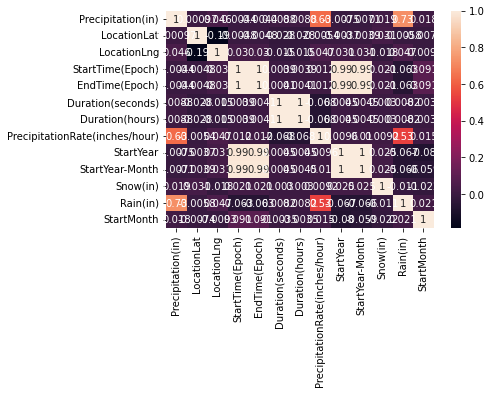

In [35]:
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

### Here is the correlation heatmap using code derived from the example in the current task, Task 6.2.

#### First with raw matplotlib.

In [36]:
# NOTE:  The example from the Exercise needed to be tweaked, in order to omit from the axes
# the columns that are not amenable to correlation.

In [37]:
df.shape[1]

24

In [38]:
df.corr().shape[1]

13

In [39]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [40]:
df.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'StartYear', 'StartYear-Month',
       'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

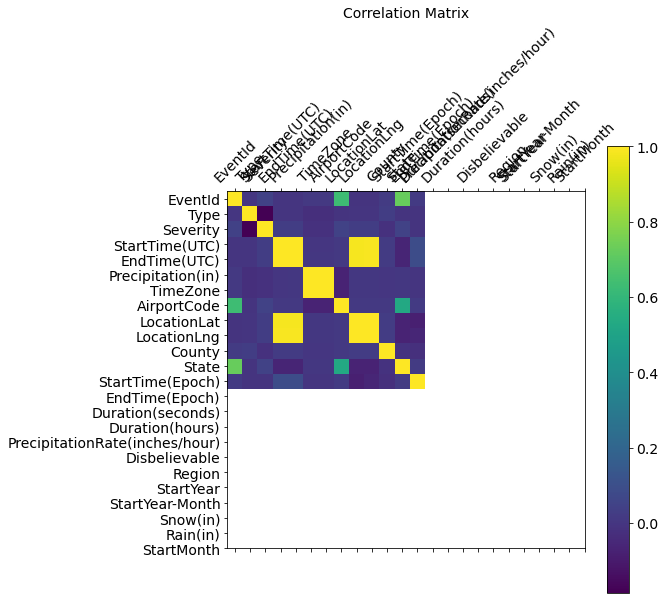

In [41]:
# Initial adaptation, with the extra columns distorting the axes.
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

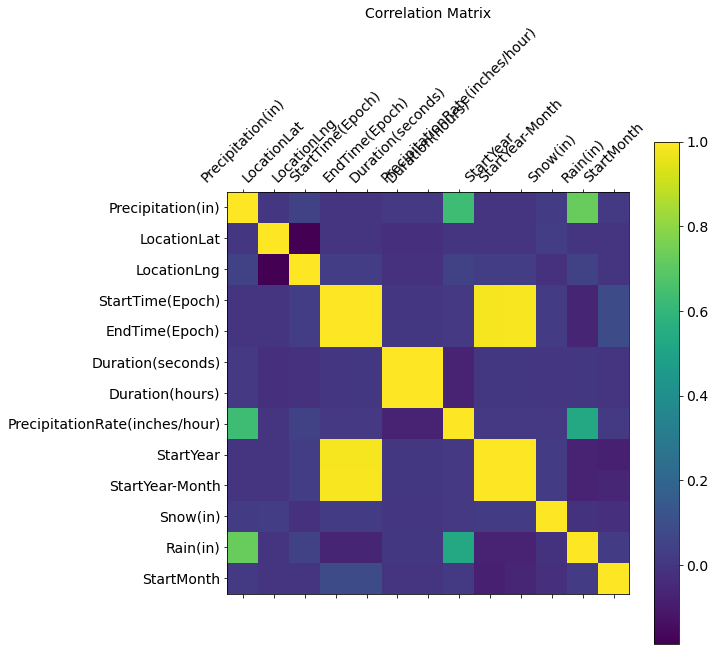

In [42]:
# A slight tweak to the plt.xticks and plt.yticks definitions removes the inappropriate columns.
f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
# REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
# plt.savefig() first, or else your file will be blank!
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-matplotlib.png'), facecolor='white')
plt.show()

#### Now with seaborn.
#### NOTE:  I'm trying to be "lazy" in creating my subset dataframe, by avoiding typing/pasting all the specific column names, like they did in the Exercice 6.2 example.  After a couple of sanity checks, I *think* it works.

In [43]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [44]:
df.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'StartYear', 'StartYear-Month',
       'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [70]:
df_subset = df[df.corr().columns]

In [46]:
df_subset.shape

(515813, 13)

In [47]:
df_subset.head()

Precipitation(in)  LocationLat  LocationLng  StartTime(Epoch)  \
136752                0.0      31.8111    -106.3758        1451997600   
136753                0.0      31.8111    -106.3758        1452019500   
136754                0.0      31.8111    -106.3758        1452085800   
136755                0.0      31.8111    -106.3758        1452093900   
136756                0.0      31.8111    -106.3758        1452095040   

        EndTime(Epoch)  Duration(seconds)  Duration(hours)  \
136752      1452004800               7200         2.000000   
136753      1452023280               3780         1.050000   
136754      1452093900               8100         2.250000   
136755      1452095040               1140         0.316667   
136756      1452097200               2160         0.600000   

        PrecipitationRate(inches/hour)  StartYear  StartYear-Month  Snow(in)  \
136752                             0.0       2016           201601       0.0   
136753                             0.0       2016           201601       0.0   
136754                             0.0       2016           201601       0.0   
136755                             0.0       2016           201601       0.0   
136756                             0.0       2016           201601       0.0   

        Rain(in)  StartMonth  
136752       0.0           1  
136753       0.0           1  
136754       0.0           1  
136755       0.0           1  
136756       0.0           1

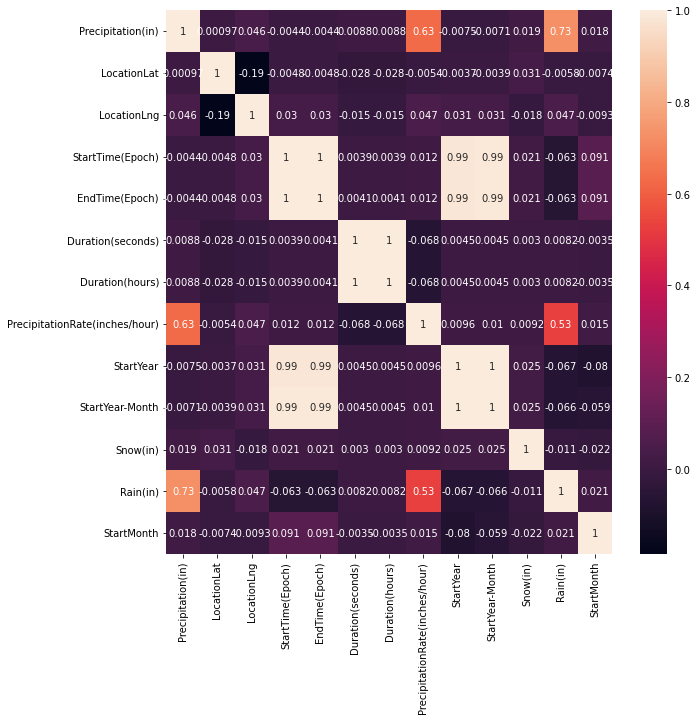

In [48]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [83]:
df.groupby(['StartYear-Month']).mean().corr()

Precipitation(in)  LocationLat  LocationLng  \
Precipitation(in)                        1.000000     0.087555    -0.057335   
LocationLat                              0.087555     1.000000    -0.497551   
LocationLng                             -0.057335    -0.497551     1.000000   
StartTime(Epoch)                         0.040534    -0.079046     0.299444   
EndTime(Epoch)                           0.040525    -0.079048     0.299446   
Duration(seconds)                       -0.702778    -0.168584     0.163715   
Duration(hours)                         -0.702778    -0.168584     0.163715   
PrecipitationRate(inches/hour)           0.962252     0.089669    -0.043946   
StartYear                                0.018636    -0.075595     0.308347   
Snow(in)                                -0.458431     0.037058     0.155256   
Rain(in)                                 0.693453     0.097537    -0.173127   
StartMonth                               0.135345    -0.030855    -0.028001   

                                StartTime(Epoch)  EndTime(Epoch)  \
Precipitation(in)                       0.040534        0.040525   
LocationLat                            -0.079046       -0.079048   
LocationLng                             0.299444        0.299446   
StartTime(Epoch)                        1.000000        1.000000   
EndTime(Epoch)                          1.000000        1.000000   
Duration(seconds)                      -0.002853       -0.002840   
Duration(hours)                        -0.002853       -0.002840   
PrecipitationRate(inches/hour)          0.167372        0.167362   
StartYear                               0.986031        0.986031   
Snow(in)                                0.212617        0.212624   
Rain(in)                               -0.473922       -0.473928   
StartMonth                              0.166514        0.166514   

                                Duration(seconds)  Duration(hours)  \
Precipitation(in)                       -0.702778        -0.702778   
LocationLat                             -0.168584        -0.168584   
LocationLng                              0.163715         0.163715   
StartTime(Epoch)                        -0.002853        -0.002853   
EndTime(Epoch)                          -0.002840        -0.002840   
Duration(seconds)                        1.000000         1.000000   
Duration(hours)                          1.000000         1.000000   
PrecipitationRate(inches/hour)          -0.779932        -0.779932   
StartYear                                0.003877         0.003877   
Snow(in)                                 0.573396         0.573396   
Rain(in)                                -0.468956        -0.468956   
StartMonth                              -0.043304        -0.043304   

                                PrecipitationRate(inches/hour)     StartYear  \
Precipitation(in)                                     0.962252  1.863566e-02   
LocationLat                                           0.089669 -7.559513e-02   
LocationLng                                          -0.043946  3.083471e-01   
StartTime(Epoch)                                      0.167372  9.860307e-01   
EndTime(Epoch)                                        0.167362  9.860308e-01   
Duration(seconds)                                    -0.779932  3.876885e-03   
Duration(hours)                                      -0.779932  3.876885e-03   
PrecipitationRate(inches/hour)                        1.000000  1.544627e-01   
StartYear                                             0.154463  1.000000e+00   
Snow(in)                                             -0.457912  2.564411e-01   
Rain(in)                                              0.571317 -4.958693e-01   
StartMonth                                            0.093389  1.614923e-14   

                                Snow(in)  Rain(in)    StartMonth  
Precipitation(in)              -0.458431  0.693453  1.353451e-01  
LocationLat                     0

In [49]:
# Save the seaborn correlation heatmap.
#corr.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 3a) Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


### Answer:
### There don't seem to be any insightful correlations among these variables.
### Obviously, precipitation rates and precipitation totals have a strong correlation, and the various time-related variables correlate, of course.
### Other than those, though, nothing quite makes the threshold of even a weak relationship (+/- 0.1).
### The closest are slight inverse relationships that Precipitation Rate has with Latitude (-0.096) and with event Duration (-0.074); the inverse relationship with Latitude might be worth investigating, but the inverse relationship with duration is counterintuitive.

# Step 4:  Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

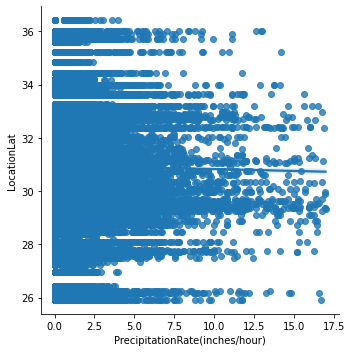

In [50]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "LocationLat" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'LocationLat', data = df_subset)
# Save the seaborn scatterplot.
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-LocLat-seaborn.png'), facecolor='white', bbox_inches='tight')

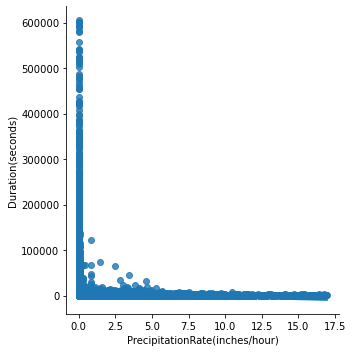

In [51]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "Duration(seconds)" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'Duration(seconds)', data = df_subset)
# Save the seaborn scatterplot.
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-DureSec-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 4a) Discuss the output in a markdown cell.

### Answer:
### There truly seems to be no linear correlation to discuss so far.
### Hopefully, once I start to investigate how the data acts over time, some good correlations will appear.

# Step 5:  Create a pair plot of the entire subset.

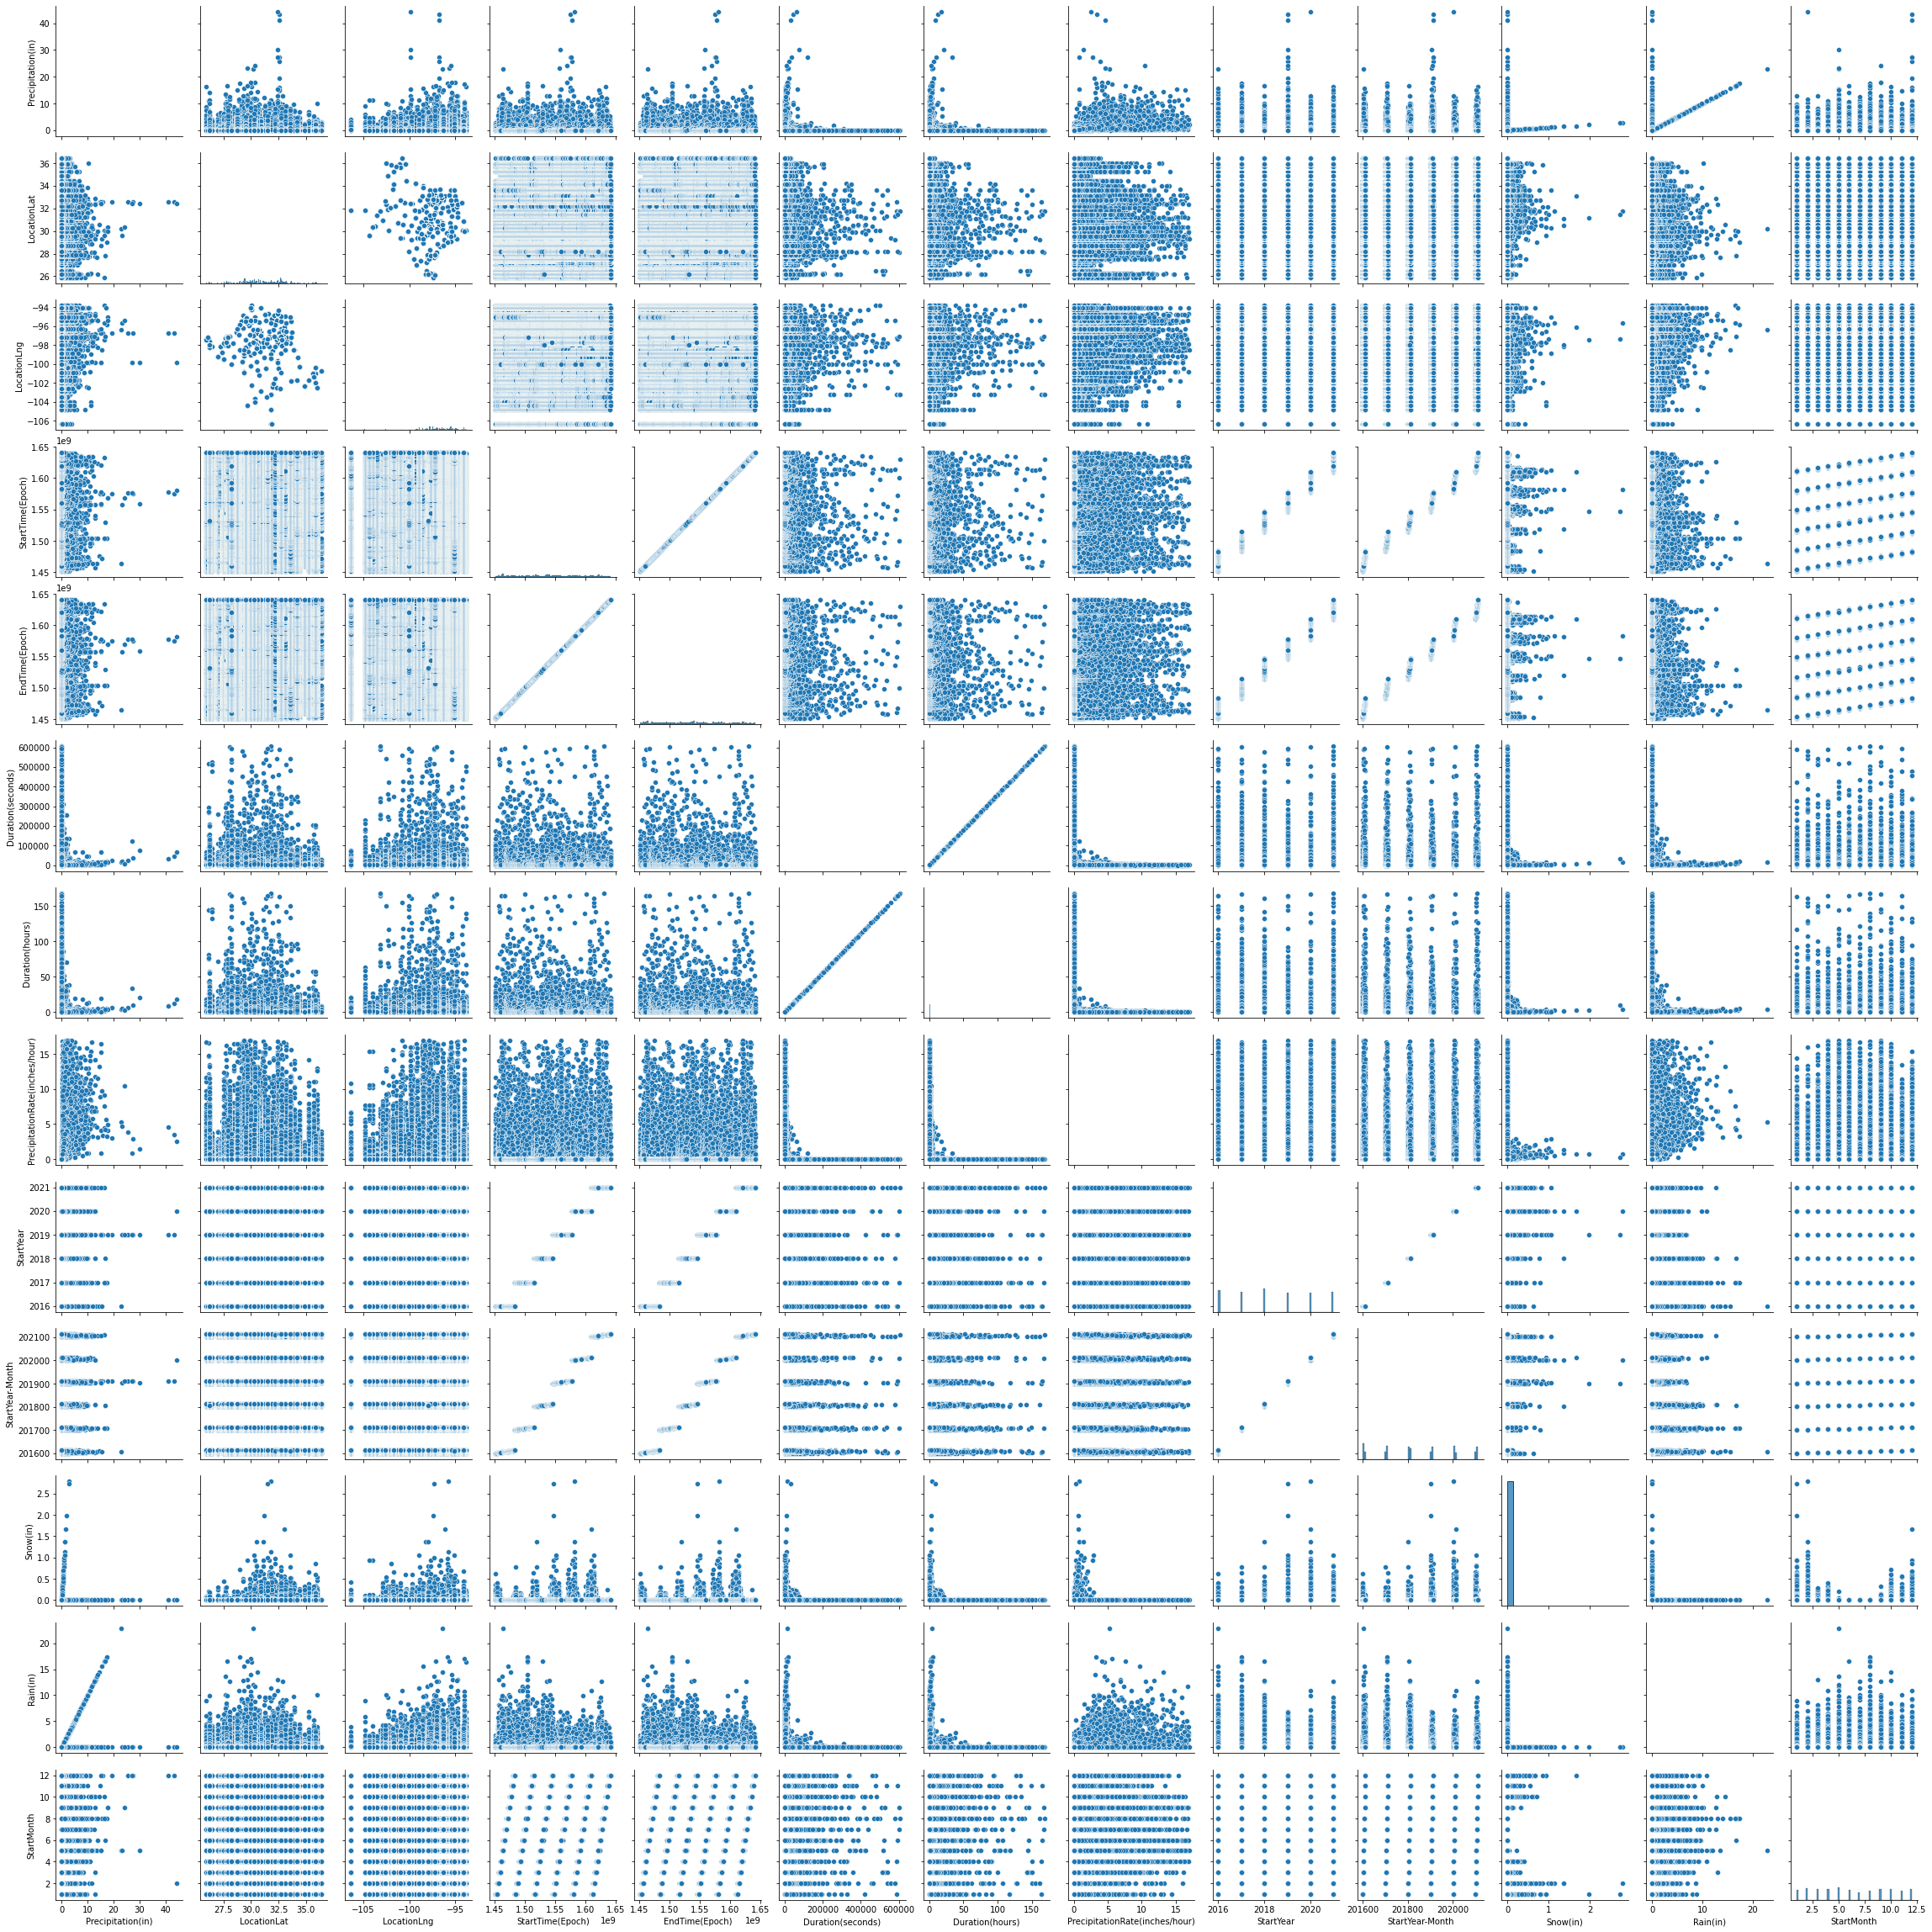

In [52]:
# Create a pair plot 

pair_plot = sns.pairplot(df_subset)

In [84]:
df_subset_2 = df[df.groupby(['StartYear-Month']).mean().corr().columns]

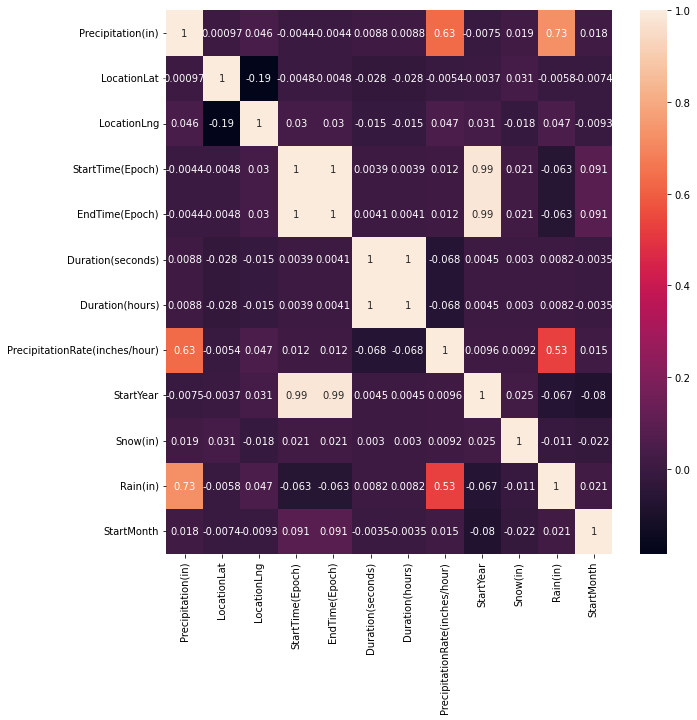

In [85]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [86]:
df_subset_2.head()

Precipitation(in)  LocationLat  LocationLng  StartTime(Epoch)  \
136752                0.0      31.8111    -106.3758        1451997600   
136753                0.0      31.8111    -106.3758        1452019500   
136754                0.0      31.8111    -106.3758        1452085800   
136755                0.0      31.8111    -106.3758        1452093900   
136756                0.0      31.8111    -106.3758        1452095040   

        EndTime(Epoch)  Duration(seconds)  Duration(hours)  \
136752      1452004800               7200         2.000000   
136753      1452023280               3780         1.050000   
136754      1452093900               8100         2.250000   
136755      1452095040               1140         0.316667   
136756      1452097200               2160         0.600000   

        PrecipitationRate(inches/hour)  StartYear  Snow(in)  Rain(in)  \
136752                             0.0       2016       0.0       0.0   
136753                             0.0       2016       0.0       0.0   
136754                             0.0       2016       0.0       0.0   
136755                             0.0       2016       0.0       0.0   
136756                             0.0       2016       0.0       0.0   

        StartMonth  
136752           1  
136753           1  
136754           1  
136755           1  
136756           1

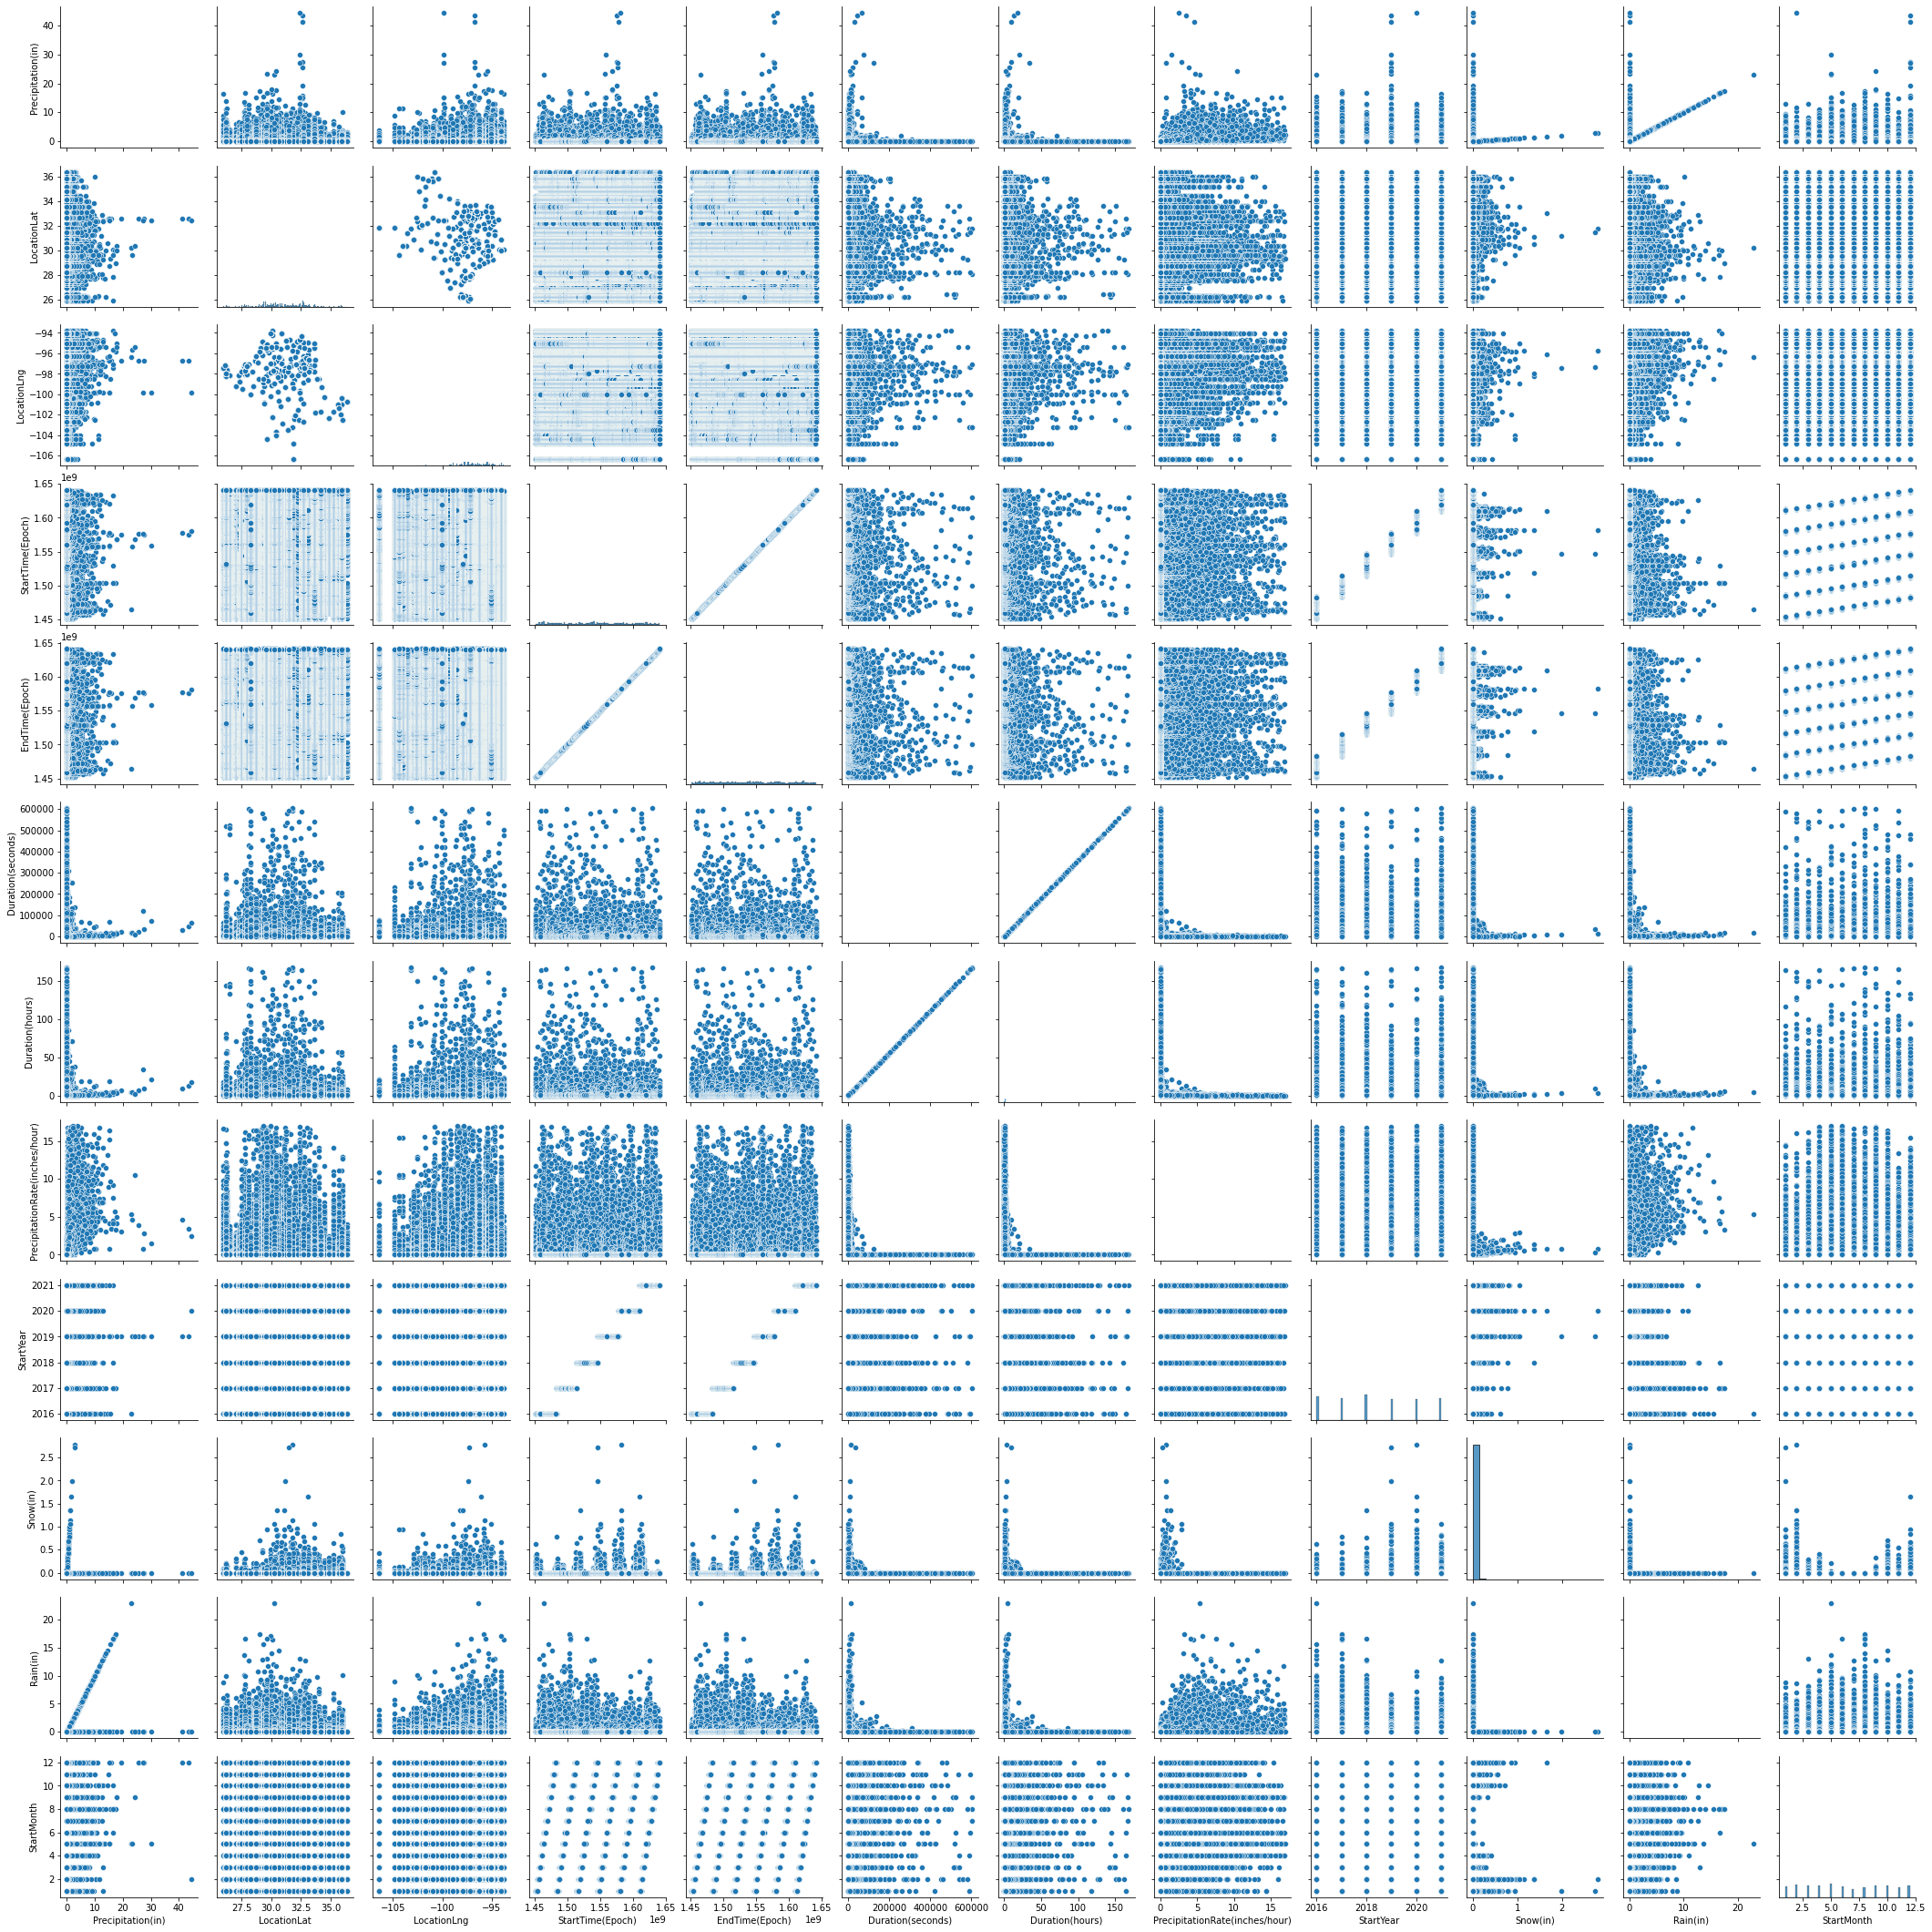

In [87]:
# Create a pair plot 

pair_plot = sns.pairplot(df_subset_2)

In [53]:
# Save the seaborn pairplot.
#pair_plot.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-pairplot.png'), facecolor='white', bbox_inches='tight')

### Step 5a) Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


### Answer:
### The only plots that show correlation are those comparing total precipitation amounts - the Precipitation(in) column - with the Duration columns.  However, while a clear line of correlation is visible, there are so many outliers that we don't see high correlation coefficients.  *This could mean that we need to separate the data further, somehow.*
### On a side note, it is reassuring to see that the scatterplots of Location Latitude vs. Location Longitude resemble maps of the 48 contiguous United States.  This would appear to confirm that we have fairly good geographical representation.
### Hopefully, once I start to investigate how the data acts over time, more correlations will appear.

# Step 6:  Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

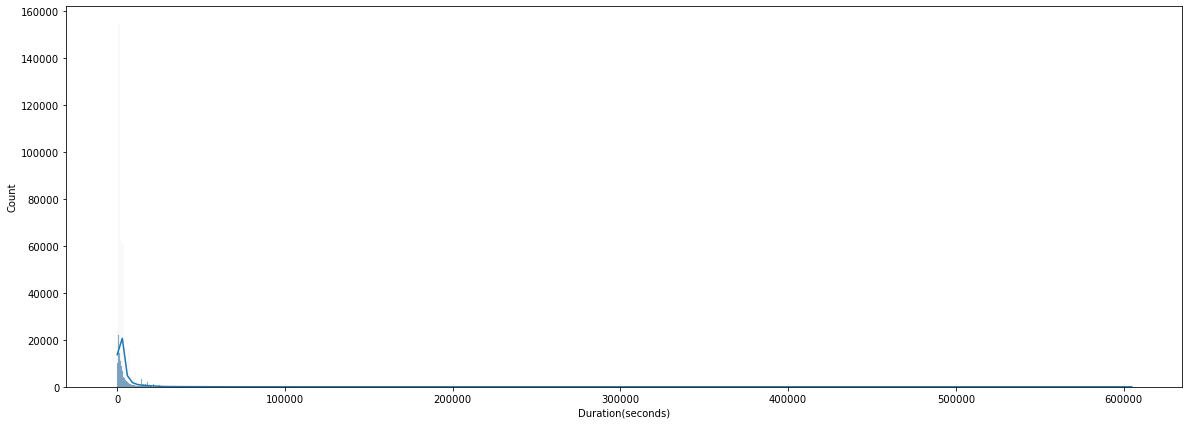

In [54]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset['Duration(seconds)'], bins = 2000, kde = True)

### Let's focus the histogram on durations of less than twelve hours (43,200 seconds).

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

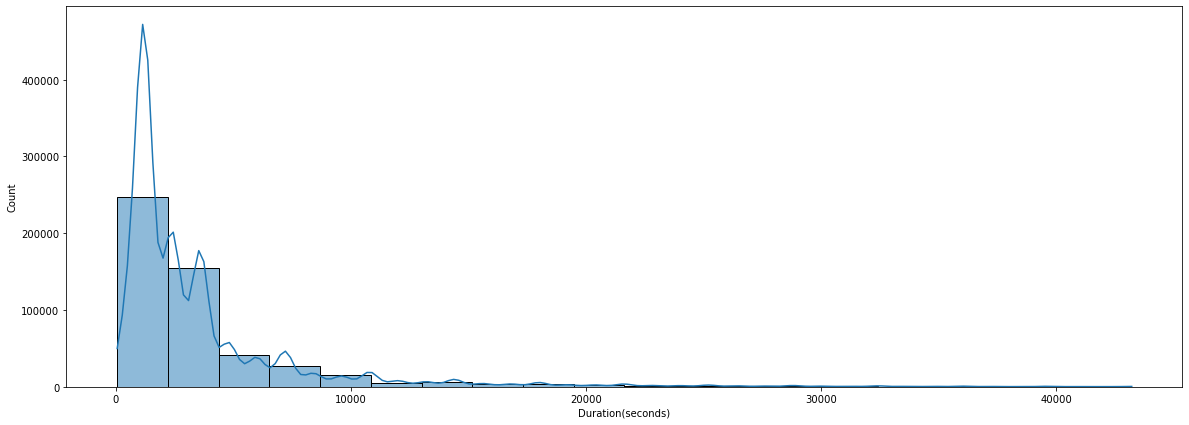

In [55]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset.loc[df_subset['Duration(seconds)'] <= 43200]['Duration(seconds)'], bins = 20, kde = True)

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

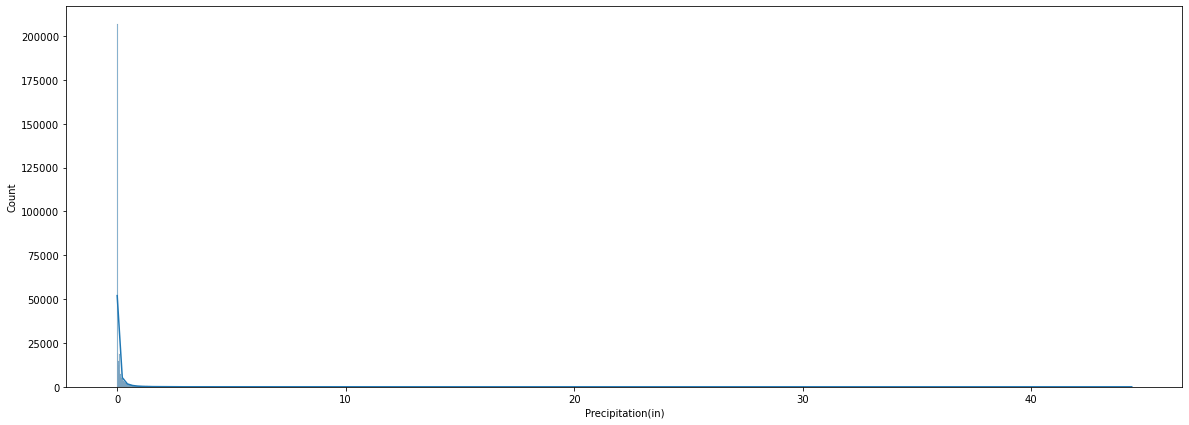

In [56]:
# Use a histogram to visualize the distribution of the 'Precipitation(in)' variable.
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['Precipitation(in)'], bins = 2000, kde = True)

### Can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [57]:
df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['Precipitation(in)'].describe()

count    365575.000000
mean          0.149809
std           0.496142
min           0.000000
25%           0.000000
50%           0.010000
75%           0.120000
max          44.400000
Name: Precipitation(in), dtype: float64

### Unfortunately, the vast majority of even "wet" events have precipitation amounts under one-tenth of an inch.  It is difficult to feel confident in such measurements.

### How about *rates* of precipitation, then?

<AxesSubplot:xlabel='PrecipitationRate(inches/hour)', ylabel='Count'>

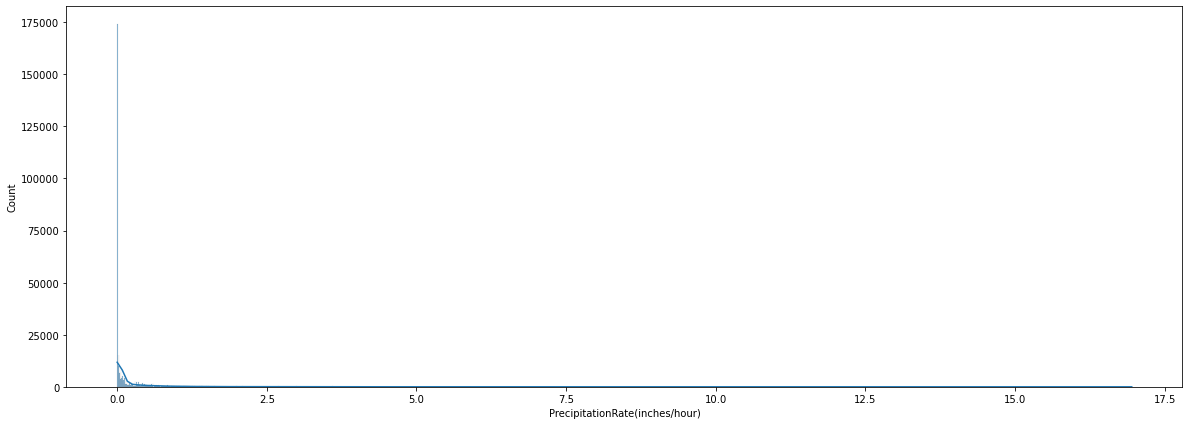

In [58]:
# Use a histogram to visualize the distribution of the 'PrecipitationRate(inches/hour)' variable. 
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
#sns.histplot(df_subset['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)
sns.histplot(df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)

### Again, we have wide-ranging values skewed toward zero.
### Again, can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [59]:
df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'].describe()

count    365575.000000
mean          0.301486
std           0.907192
min           0.000000
25%           0.000000
50%           0.013433
75%           0.163636
max          16.950000
Name: PrecipitationRate(inches/hour), dtype: float64

### Unfortunately, the majority of even "wet" events also have precipitation *rates* under one-tenth of an inch per hour.  It is difficult to feel confident in such measurements.

# Step 7:  Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### All questions raisde in Task 6.1 require analyzing the data over time, which we have not yet done.
### Here are the questions:
### 1) Have the frequencies, mean durations, or other characteristics of particular types of events changed over time?
### 2) How closely do latitude and longitude correlate with the frequency of particular types of events?
### 3) Do any correlation coefficients change significantly from year to year?

# Step 8:  Define any hypotheses that you can at this point. You’ll be testing these later on.

### The hypotheses will depend on time-based analysis, as well.  The current data, without correlations, does not present any obvious hypothesis to test.

# Repeating some analysis with a smaller set of columns, to make it easier to focus.

In [60]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [61]:
df_smaller_subset = df[['Duration(seconds)','Duration(hours)', 'StartYear', 'StartYear-Month', 'StartMonth', 'Snow(in)', 'Rain(in)', 'PrecipitationRate(inches/hour)']]

In [62]:
df_smaller_subset.columns

Index(['Duration(seconds)', 'Duration(hours)', 'StartYear', 'StartYear-Month',
       'StartMonth', 'Snow(in)', 'Rain(in)', 'PrecipitationRate(inches/hour)'],
      dtype='object')

In [63]:
df_smaller_subset.shape

(515813, 8)

In [64]:
df_smaller_subset.corr()

Duration(seconds)  Duration(hours)  StartYear  \
Duration(seconds)                        1.000000         1.000000   0.004527   
Duration(hours)                          1.000000         1.000000   0.004527   
StartYear                                0.004527         0.004527   1.000000   
StartYear-Month                          0.004461         0.004461   0.999791   
StartMonth                              -0.003537        -0.003537  -0.079902   
Snow(in)                                 0.003026         0.003026   0.025057   
Rain(in)                                 0.008216         0.008216  -0.066793   
PrecipitationRate(inches/hour)          -0.067526        -0.067526   0.009639   

                                StartYear-Month  StartMonth  Snow(in)  \
Duration(seconds)                      0.004461   -0.003537  0.003026   
Duration(hours)                        0.004461   -0.003537  0.003026   
StartYear                              0.999791   -0.079902  0.025057   
StartYear-Month                        1.000000   -0.059499  0.024647   
StartMonth                            -0.059499    1.000000 -0.021739   
Snow(in)                               0.024647   -0.021739  1.000000   
Rain(in)                              -0.066458    0.020973 -0.010692   
PrecipitationRate(inches/hour)         0.009963    0.015148  0.009205   

                                Rain(in)  PrecipitationRate(inches/hour)  
Duration(seconds)               0.008216                       -0.067526  
Duration(hours)                 0.008216                       -0.067526  
StartYear                      -0.066793                        0.009639  
StartYear-Month                -0.066458                        0.009963  
StartMonth                      0.020973                        0.015148  
Snow(in)                       -0.010692                        0.009205  
Rain(in)                        1.000000                        0.529701  
PrecipitationRate(inches/hour)  0.529701                        1.000000

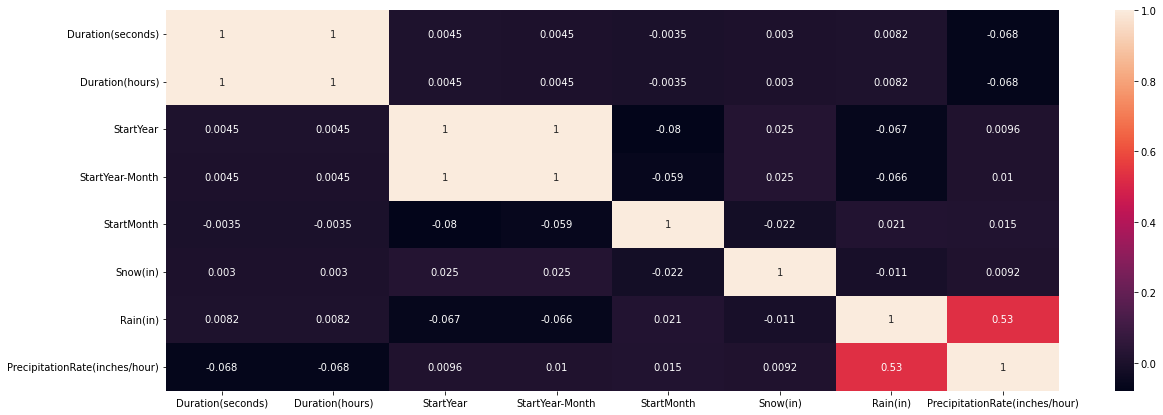

In [65]:
sns.heatmap(df_smaller_subset.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

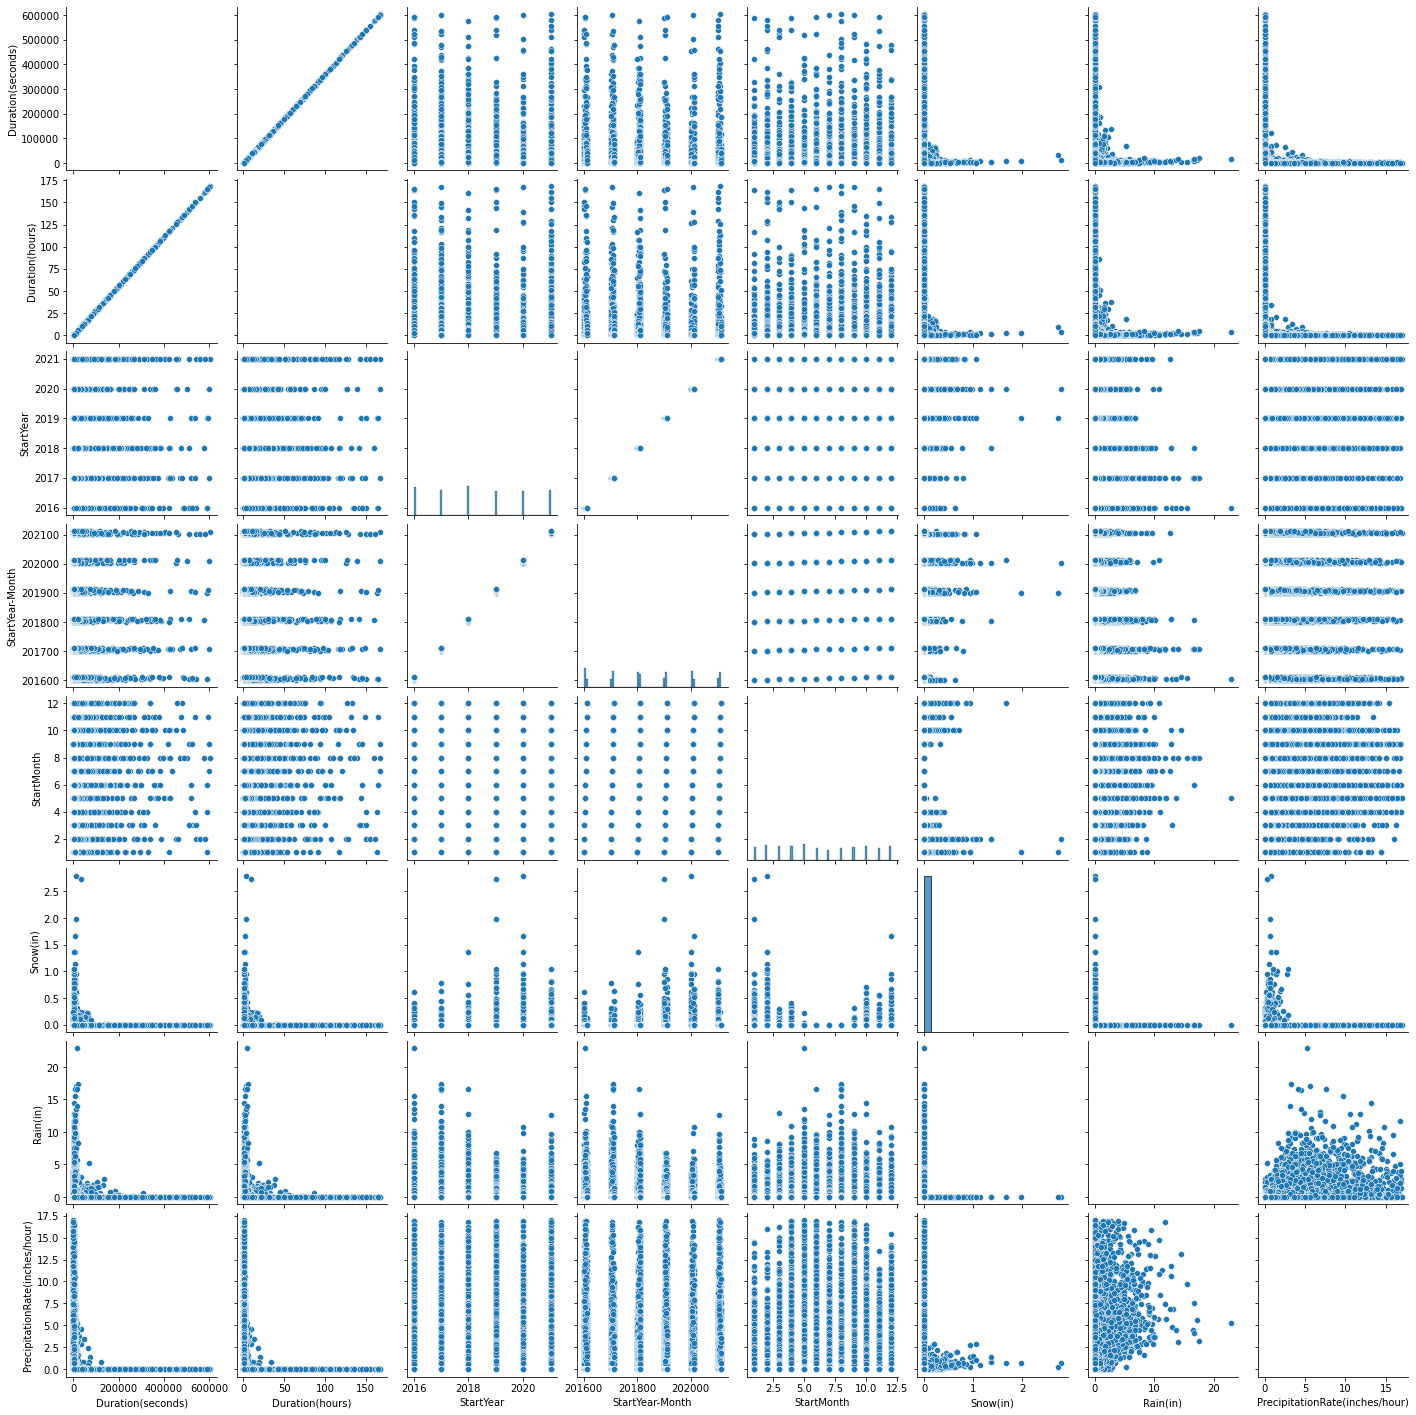

In [66]:
# Create a pair plot 

pair_plot = sns.pairplot(df_smaller_subset)

# Below this is cruft from our previous Notebook.  DO NOT EXECUTE!

In [67]:
# MAKE SURE WE STOP, BY PRETENDING THE USER HIT CTRL-C.
raise KeyboardInterrupt("Stop execution here")

KeyboardInterrupt: Stop execution here

In [ ]:
# Test to make sure this interruption code really works!
print ("Oh crap, we're still going!"

# STOP.  DO NOT EXECUTE ANY CELLS BELOW THIS ONE.

In [ ]:
# Let's save the new Dataframes created in this Task.

In [ ]:
df_no_city_zip.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'plausible_no_cities_or_zipcodes.Task-6.2.pkl'))

In [ ]:
df_subset.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'numerical_subset_of_plausible_no_cities_or_zipcodes.Task-6.1.pkl'))

# Addendum:  Splitting the dataset by Climatic Region
### According to the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI), the area of the contiguous United States can be divided into nine distinct climatic regions, each comprising a group of states:

### 1) Northeast:  Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
### 2) Upper Midwest:  Iowa, Michigan, Minnesota, Wisconsin
### 3) Ohio Valley:  Illinois, Indiana, Kentucky, Missouri, Ohio, Tennessee, West Virginia
### 4) Southeast:  Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia
### 5) Northern Rockies and Plains:  Montana, Nebraska, North Dakota, South Dakota, Wyoming
### 6) South:  Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas
### 7) Southwest:  Arizona, Colorado, New Mexico, Utah
### 8) Northwest:  Idaho, Oregon, Washington
### 9) West:  California, Nevada

### From https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions :
#### "Through climate analysis, National Centers for Environmental Information scientists have identified nine climatically consistent regions within the contiguous United States which are useful for putting current climate anomalies into a historical perspective (Karl and Koss, 1984)."
##### Source:  Thomas R. Karl and Walter James Koss, 1984: "Regional and National Monthly, Seasonal, and Annual Temperature Weighted by Area, 1895-1983." Historical Climatology Series 4-3, National Climatic Data Center, Asheville, NC, 38 pp.


## The dataset studied in Tasks 6.1 and 6.2 may be better analyzed by dividing based on the climatic region of each state.

In [ ]:
# Define our regions based on the description above; our dataset uses two-letter abbreviations, which I generated manually.

In [ ]:
reg_1_ne = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
reg_2_umw = ['IA', 'MI', 'MN', 'WI']
reg_3_ov = ['IL', 'IN', 'KY', 'MO', 'OH', 'TN', 'WV']
reg_4_se = ['AL', 'FL', 'GA', 'NC', 'SC', 'VA']
reg_5_nrap = ['MT', 'NE', 'ND', 'SD', 'WY']
reg_6_s = ['AR', 'KS', 'LA', 'MS', 'OK', 'TX']
reg_7_sw = ['AZ', 'CO', 'NM', 'UT']
reg_8_nw = ['ID', 'OR', 'WA']
reg_9_w = ['CA', 'NV']

In [ ]:
# Build a new 'Region' column based on matches for these groups of states.

In [ ]:
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_1_ne), 'Region'] = 'Northeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_2_umw), 'Region'] = 'Upper Midwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_3_ov), 'Region'] = 'Ohio Valley'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_4_se), 'Region'] = 'Southeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_5_nrap), 'Region'] = 'Northern Rockies and Plains'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_6_s), 'Region'] = 'South'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_7_sw), 'Region'] = 'Southwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_8_nw), 'Region'] = 'Northwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_9_w), 'Region'] = 'West'

In [ ]:
# Let's assign this modified dataframe a new name.

In [ ]:
df_all_states_regions = df_no_city_zip

In [ ]:
# Quick sanity-checks of the new dataframe.

In [ ]:
df_all_states_regions.shape

In [ ]:
df_all_states_regions.head()

In [ ]:
df_all_states_regions.tail()

In [ ]:
# Save the df_all_states_regions dataframe for future loading, even though I doubt we'll use it.

In [ ]:
df_all_states_regions.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_all_states_regions.Task-6.2.pkl'))

## Split the df_all_states_regions dataframe into a separate dataframe for each region.  This offers two advantages.
## 1) Each region can be analyzed separately for correlations and trends.
## 2) CPU-intensive operations can be run for reach region in a separate Jupyter Notebook, allowing us to take advantage of multiple CPUs for simultaneous processing, avoiding the singl-CPU bottleneck.

In [ ]:
for region_name in df_all_states_regions['Region'].unique():
    # Replace uppercase letters with lowercase letters
    region_code = region_name.lower()
    
    # Replace spaces with underscores
    region_code = region_code.replace(' ', '_')
    
    # Create a new dataframe and assign it to a dynamically generated variable name
    globals()['df_' + region_code] = df_all_states_regions.loc[df_all_states_regions['Region'] == region_name]
    
    print ('df_' + region_code)
    print(globals()['df_' + region_code].shape)
    
    # Save each new dataframe to a pickle file.
    globals()['df_' + region_code].to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_' + region_code + '.Task-6.2.pkl'))
    print()